### Linear Regression From Scratch

y=w.X+b

**Learning Rate**

**no of iterations**


### work flow of Linear Regression 
1>setup learning rate and the no of iterations : initiate the weight and bias randomly

2>build linear regression model  (y=wx+b)

3>find the y_predict value given x value fo the corresponding weight and bias 

4>check the loss function for these parameter 

5>update the parameter values  using gradient descent 

6>step 3,4,5 are repeated until we get the minimum loss function 

7>finally we get the model 

In [20]:
#importing the dependencies 
import numpy as np

In [21]:
class Linear_Regression():
    #initaating the parameters(learningrate,no of iterations)
    def __init__(self,learning_rate,no_of_iterations):
        self.learning_rate=learning_rate
        self.no_of_iterations=no_of_iterations

    def fit(self,X,Y):
        self.m,self.n=X.shape #m->no of rows in x, n-> no fo columns in x
        #initializing the weights and bias randomly
        self.w=np.zeros(self.n)
        self.b=0
        self.X=X
        self.Y=Y
        #implementing the gradient descent
        for i in range(self.no_of_iterations):
            self.update_weights()
        

    def update_weights(self):
        Y_predict=self.predict(self.X)
        dw=(-2*(self.X.T).dot(self.Y-Y_predict))/self.m
        db=-2*np.sum(self.Y-Y_predict)/self.m

        #now updating the weights
        self.w=self.w - self.learning_rate*dw
        self.b=self.b - self.learning_rate*db
        
        

    def predict(self,X):
        return X.dot(self.w)+self.b 
        
    
    

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [4]:
data=pd.read_csv('../datasets/salary_data.csv')

In [5]:
data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [6]:
data.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [7]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [8]:
data.shape

(30, 2)

### splitting the dataset into x and y

In [10]:
x=data.iloc[:,:-1].values 
y=data.iloc[:,1].values

In [12]:
print(x)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [13]:
print(y)

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=3)

In [16]:
print(x.shape,x_train.shape,x_test.shape)

(30, 1) (20, 1) (10, 1)


In [17]:
print(y.shape,y_train.shape,y_test.shape)

(30,) (20,) (10,)


In [18]:
model=Linear_Regression(learning_rate=0.02,no_of_iterations=1000)

In [22]:
model.fit(x_train,y_train)

**Printing the weight and bias Values**

In [23]:
print('weights',model.w[0])

weights 9461.775998886964


In [24]:
print('bias',model.b)

bias 26493.429738199593


**eqn of weight and bias**

y=(9461)X+26493

person of salaray=9461(year of experince)+26493

### Lets do some prediction with models

In [25]:
predict=model.predict(x_test)

In [26]:
print(predict)

[ 72856.13213275  53932.58013497 101241.46012941 116380.30172763
  82317.90813163  69071.42173319  65286.71133364  40686.09373653
  74748.48733252  38793.73853675]


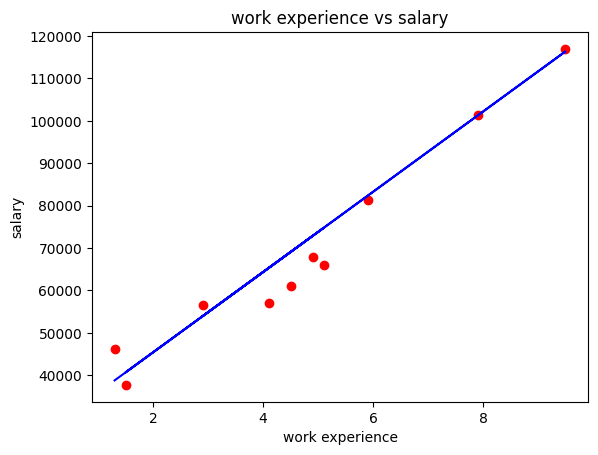

In [27]:
plt.scatter(x_test,y_test,color='red')
plt.plot(x_test,predict,color='blue')
plt.xlabel('work experience')
plt.ylabel('salary')
plt.title("work experience vs salary")
plt.show()